In [3]:
!pip install mlrose_hiive
!pip install joblib===1.2.0


  Using cached mlrose_hiive-2.2.4-py3-none-any.whl
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


In [4]:
import mlrose_hiive as mlrose
import numpy as np
import time



Define algorithms

In [5]:
rs = 614

def rhc(problem_fit, problem_size):
    return mlrose.random_hill_climb(problem_fit,restarts=10*problem_size,max_attempts=10,max_iters=problem_size*10,init_state=None,curve=True)

def sa(problem_fit,problem_size):
    return mlrose.simulated_annealing(problem_fit,schedule=mlrose.GeomDecay(),max_attempts=10,init_state=None,max_iters=problem_size*10,curve=True)

def ga(problem_fit,problem_size):
   return mlrose.genetic_alg(problem_fit,pop_size=10*problem_size,mutation_prob=0.4,max_attempts=10,max_iters=problem_size*10,curve=True)

def mimic(problem_fit, problem_size):
   return mlrose.mimic(problem_fit,pop_size=10*problem_size, keep_pct=0.2,max_attempts=10,max_iters=problem_size*10,curve=True)


FlipFlop

In [6]:
fitness = mlrose.FlipFlop()

In [7]:

RHC_outputs=[]
GA_outputs=[]
SA_outputs=[]
MIMIC_outputs=[]

for problem_size in range(10,100,20):
    print(problem_size)

    # Object containing fitness function optimization problem to be solved - Discrete Opt
    opt_problem = mlrose.DiscreteOpt(length = problem_size,fitness_fn = fitness,maximize = True,max_val = 2)

    #RHC
    start=time.time()
    fitness_score = rhc(opt_problem,problem_size)
    end=time.time()
    RHC_outputs.append([problem_size,end-start,fitness_score[2][-1,0],fitness_score[2][-1,1],fitness_score[2][-1,1]/(end-start)])

    #SA
    start=time.time()
    SA_curve = sa(opt_problem,problem_size)
    end=time.time()
    SA_outputs.append([problem_size,end-start,SA_curve[2][-1,0],SA_curve[2][-1,1],SA_curve[2][-1,1]/(end-start)])

    #GA
    start=time.time()
    GA_curve = ga(opt_problem,problem_size)
    end=time.time()
    GA_outputs.append([problem_size,end-start,GA_curve[2][-1,0],GA_curve[2][-1,1],GA_curve[2][-1,1]/(end-start)])

    #MIMIC
    start=time.time()
    MIMIC_curve = mimic(opt_problem,problem_size)
    end=time.time()
    MIMIC_outputs.append([problem_size,end-start,MIMIC_curve[2][-1,0],MIMIC_curve[2][-1,1],MIMIC_curve[2][-1,1]/(end-start)])




10
30
50
70
90


<Axes: title={'center': 'Time Taken vs Problem Size'}, xlabel='Problem Size', ylabel='Time'>

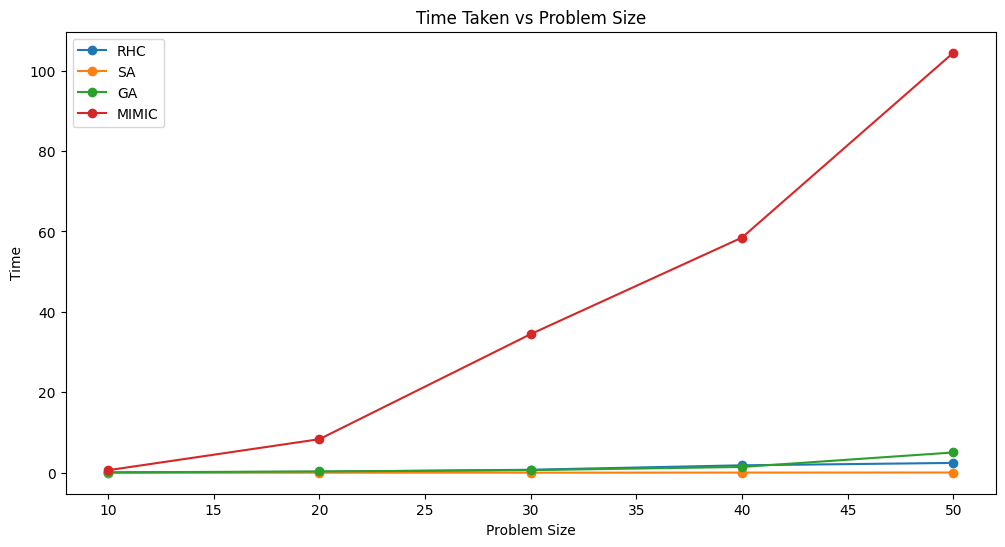

In [8]:
import pandas as pd
i=1
RHC_time = pd.DataFrame(RHC_outputs)[i]
GA_time = pd.DataFrame(GA_outputs)[i]
SA_time = pd.DataFrame(SA_outputs)[i]
MIMIC_time = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_time,SA_time,GA_time, MIMIC_time], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","SA","GA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Time",title="Time Taken vs Problem Size",figsize=(12,6))

<Axes: title={'center': 'Best Fitness vs Problem Size'}, xlabel='Problem Size', ylabel='Best Fitness value'>

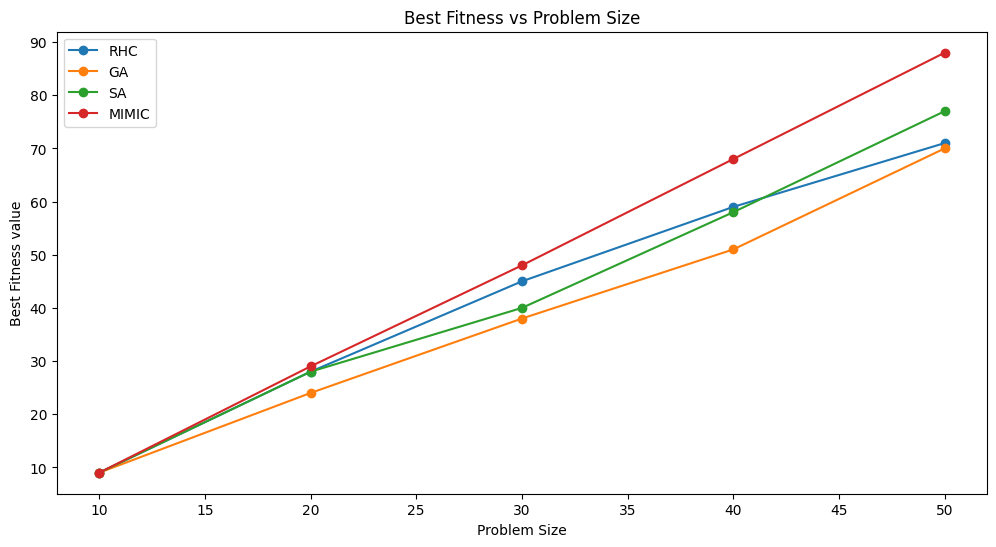

In [9]:
i=2
RHC_fitness = pd.DataFrame(RHC_outputs)[i]
GA_fitness = pd.DataFrame(GA_outputs)[i]
SA_fitness = pd.DataFrame(SA_outputs)[i]
MIMIC_fitness = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_fitness,GA_fitness,SA_fitness,MIMIC_fitness], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","GA","SA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Best Fitness value",title="Best Fitness vs Problem Size",figsize=(12,6))

FOUR PEAKS

In [10]:
fitness = mlrose.FourPeaks(t_pct=.5)

In [11]:
RHC_outputs=[]
GA_outputs=[]
SA_outputs=[]
MIMIC_outputs=[]

for problem_size in range(10,100,20):
    print(problem_size)

    # Object containing fitness function optimization problem to be solved - Discrete Opt
    opt_problem = mlrose.DiscreteOpt(length = problem_size,fitness_fn = fitness,maximize = True,max_val = 2)

    #RHC
    start=time.time()
    fitness_score = rhc(opt_problem,problem_size)
    end=time.time()
    RHC_outputs.append([problem_size,end-start,fitness_score[2][-1,0],fitness_score[2][-1,1],fitness_score[2][-1,1]/(end-start)])

    #SA
    start=time.time()
    SA_curve = sa(opt_problem,problem_size)
    end=time.time()
    SA_outputs.append([problem_size,end-start,SA_curve[2][-1,0],SA_curve[2][-1,1],SA_curve[2][-1,1]/(end-start)])

    #GA
    start=time.time()
    GA_curve = ga(opt_problem,problem_size)
    end=time.time()
    GA_outputs.append([problem_size,end-start,GA_curve[2][-1,0],GA_curve[2][-1,1],GA_curve[2][-1,1]/(end-start)])

    #MIMIC
    start=time.time()
    MIMIC_curve = mimic(opt_problem,problem_size)
    end=time.time()
    MIMIC_outputs.append([problem_size,end-start,MIMIC_curve[2][-1,0],MIMIC_curve[2][-1,1],MIMIC_curve[2][-1,1]/(end-start)])


10
30
50
70
90


<Axes: title={'center': 'Time Taken vs Problem Size'}, xlabel='Problem Size', ylabel='Time'>

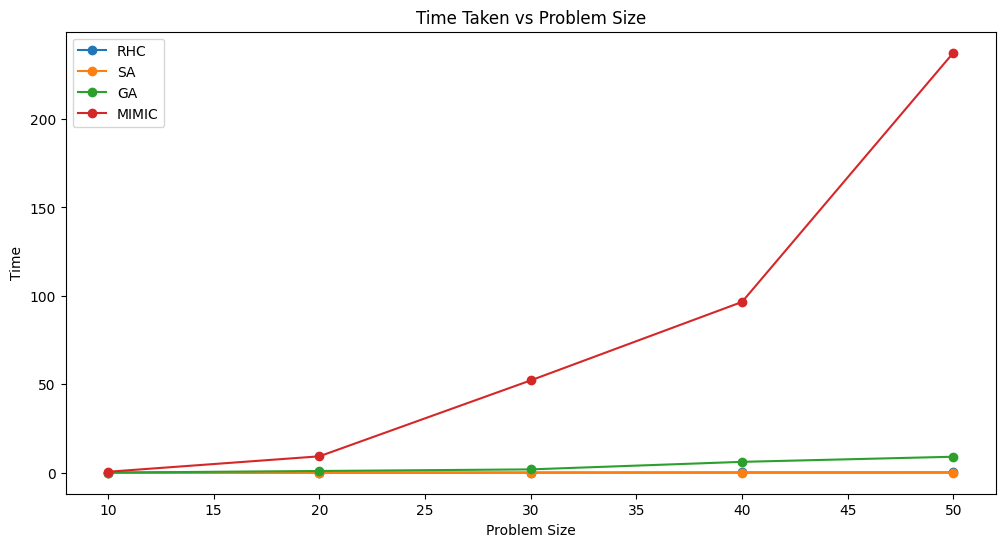

In [12]:
i=1
RHC_time = pd.DataFrame(RHC_outputs)[i]
GA_time = pd.DataFrame(GA_outputs)[i]
SA_time = pd.DataFrame(SA_outputs)[i]
MIMIC_time = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_time,SA_time,GA_time, MIMIC_time], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","SA","GA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Time",title="Time Taken vs Problem Size",figsize=(12,6))

<Axes: title={'center': 'Best Fitness vs Problem Size'}, xlabel='Problem Size', ylabel='Best Fitness value'>

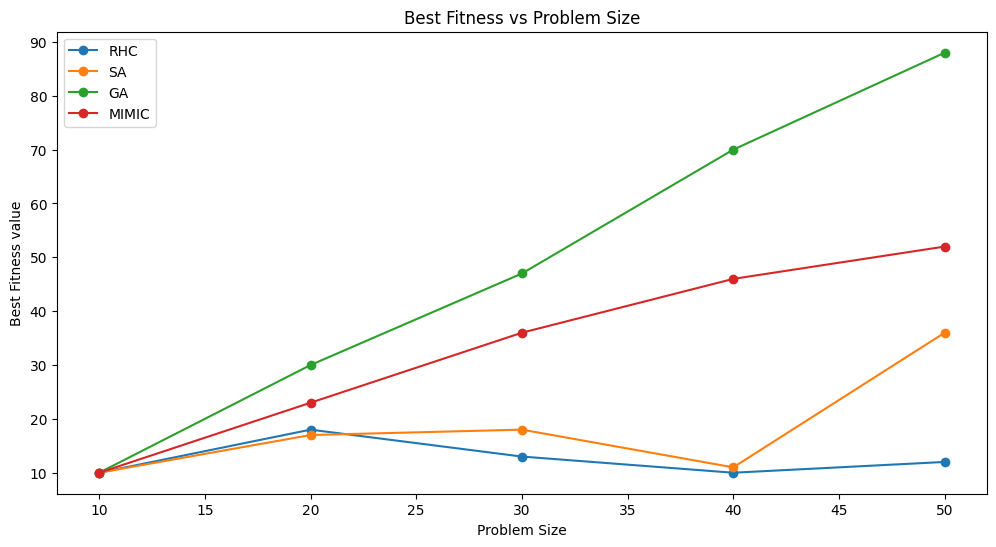

In [14]:
i=2
RHC_time = pd.DataFrame(RHC_outputs)[i]
GA_time = pd.DataFrame(GA_outputs)[i]
SA_time = pd.DataFrame(SA_outputs)[i]
MIMIC_time = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_time,SA_time,GA_time, MIMIC_time], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","SA","GA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Best Fitness value",title="Best Fitness vs Problem Size",figsize=(12,6))

ONE MAX

In [15]:
fitness = mlrose.OneMax()

In [16]:
RHC_outputs=[]
GA_outputs=[]
SA_outputs=[]
MIMIC_outputs=[]

for problem_size in range(10,100,20):
    print(problem_size)

    # Object containing fitness function optimization problem to be solved - Discrete Opt
    opt_problem = mlrose.DiscreteOpt(length = problem_size,fitness_fn = fitness,maximize = True,max_val = 2)

    #RHC
    start=time.time()
    fitness_score = rhc(opt_problem,problem_size)
    end=time.time()
    RHC_outputs.append([problem_size,end-start,fitness_score[2][-1,0],fitness_score[2][-1,1],fitness_score[2][-1,1]/(end-start)])

    #SA
    start=time.time()
    SA_curve = sa(opt_problem,problem_size)
    end=time.time()
    SA_outputs.append([problem_size,end-start,SA_curve[2][-1,0],SA_curve[2][-1,1],SA_curve[2][-1,1]/(end-start)])

    #GA
    start=time.time()
    GA_curve = ga(opt_problem,problem_size)
    end=time.time()
    GA_outputs.append([problem_size,end-start,GA_curve[2][-1,0],GA_curve[2][-1,1],GA_curve[2][-1,1]/(end-start)])

    #MIMIC
    start=time.time()
    MIMIC_curve = mimic(opt_problem,problem_size)
    end=time.time()
    MIMIC_outputs.append([problem_size,end-start,MIMIC_curve[2][-1,0],MIMIC_curve[2][-1,1],MIMIC_curve[2][-1,1]/(end-start)])

10
30
50
70
90


<Axes: title={'center': 'Time Taken vs Problem Size'}, xlabel='Problem Size', ylabel='Time'>

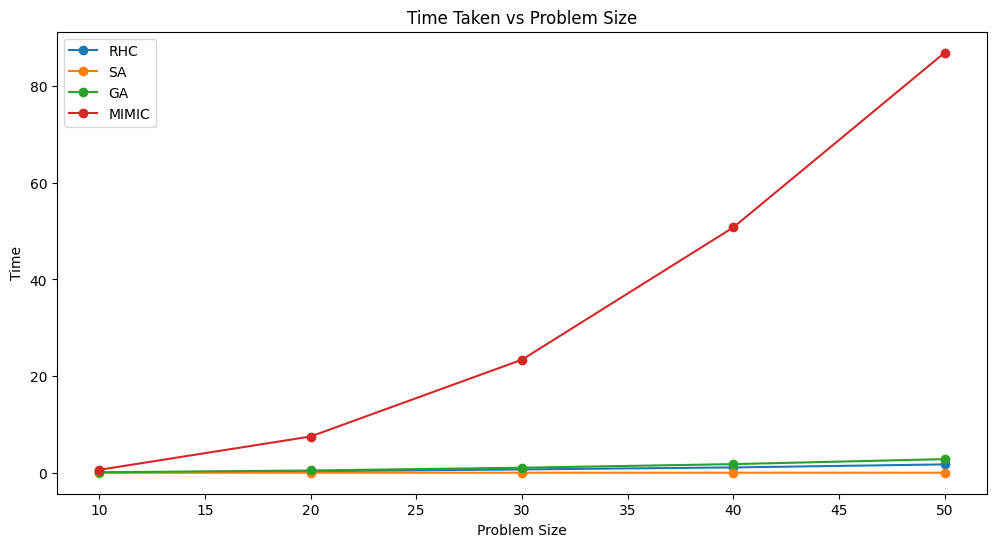

In [17]:
i=1
RHC_time = pd.DataFrame(RHC_outputs)[i]
GA_time = pd.DataFrame(GA_outputs)[i]
SA_time = pd.DataFrame(SA_outputs)[i]
MIMIC_time = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_time,SA_time,GA_time, MIMIC_time], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","SA","GA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Time",title="Time Taken vs Problem Size",figsize=(12,6))

<Axes: title={'center': 'Best Fitness vs Problem Size'}, xlabel='Problem Size', ylabel='Best Fitness value'>

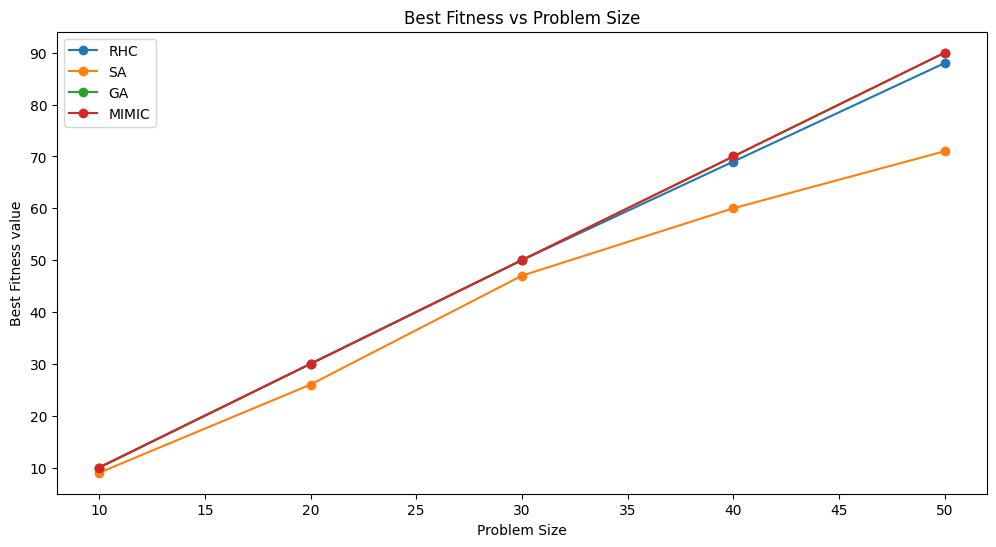

In [18]:
i=2
RHC_time = pd.DataFrame(RHC_outputs)[i]
GA_time = pd.DataFrame(GA_outputs)[i]
SA_time = pd.DataFrame(SA_outputs)[i]
MIMIC_time = pd.DataFrame(MIMIC_outputs)[i]

df = pd.concat([RHC_time,SA_time,GA_time, MIMIC_time], ignore_index=True, axis=1)
df.index=range(10,60,10)
df.columns = ["RHC","SA","GA","MIMIC"]
df.plot(marker='o',xlabel="Problem Size",ylabel="Best Fitness value",title="Best Fitness vs Problem Size",figsize=(12,6))